**Assignment 2B**\
**Jule Valendo Halim -1425567**\
**4/24/2024**

# Question 1

c:\Users\julev\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Number of Entries: 54017
Number of Unique Doctors: 19097 

Distribution of Ratings:
 rating
 1    38847
-1    15170
Name: count, dtype: int64


<Axes: title={'center': 'Distribution Graph of Ratings'}, xlabel='Count', ylabel='Rating'>

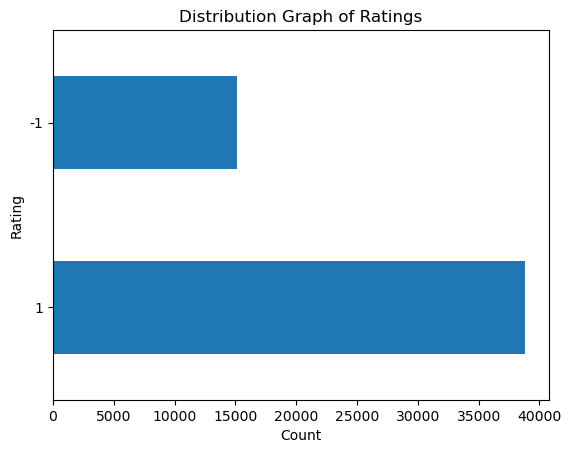

In [1]:
##Question 1

##loading in the dr_review

import pandas as pd

path='./DR_REVIEW/ratemd-dr-ratings.csv'
drReview=pd.read_csv(path)

print('Number of Entries:',drReview.shape[0])
print('Number of Unique Doctors:',drReview['dr-id-adjusted'].nunique(),'\n')

ratings=drReview['rating'].value_counts()
print("Distribution of Ratings:\n",ratings)

ratings.plot(kind='barh',title='Distribution Graph of Ratings', xlabel='Count',ylabel='Rating')

# Question 2

In [2]:
## Question 2

import nltk
import string
from tqdm.notebook import tqdm

stopWords=set(nltk.corpus.stopwords.words('english'))
punctuations=string.punctuation

def preprocess(text):
    tokens=nltk.word_tokenize(text.lower())
    tokensClean=[t for t in tokens if (t not in stopWords) and (t not in punctuations)]
    return ' '.join(tokensClean)

tqdm.pandas()
drReview['review-text-cleaned']=drReview['review-text-cleaned'].progress_apply(preprocess)

  0%|          | 0/54017 [00:00<?, ?it/s]

In [3]:
## Question 2 Continued
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

## Obtaining top 10 words (after tokenization and preprocessing)
stringOfReviews=' '.join(drReview['review-text-cleaned'])
words=stringOfReviews.split()
wordsFrequency=Counter(words)
sortedWords=sorted(wordsFrequency.items(),key=lambda x: x[1], reverse=True)
print('TOP 10 WORDS IN REVIEW TEXT:')
for i in range (9):
    print('WORD:',sortedWords[i][0],'//FREQUENCY:',sortedWords[i][1])

TFIDFVector=TfidfVectorizer()
tfidf=TFIDFVector.fit_transform([stringOfReviews])
features=TFIDFVector.get_feature_names_out()
scores=tfidf.toarray()[0]
zippedFeatures=list(zip(features,scores))
sortedFeatures=sorted(zippedFeatures, key=lambda x: x[1], reverse=True)
print('\nTOP 10 TFIDF SCORES:')
for i in range (9):
    print('WORD:',sortedFeatures[i][0],'//TFIDF SCORE:',sortedFeatures[i][1])


TOP 10 WORDS IN REVIEW TEXT:
WORD: dr. //FREQUENCY: 31290
WORD: doctor //FREQUENCY: 24217
WORD: time //FREQUENCY: 15234
WORD: n't //FREQUENCY: 14816
WORD: would //FREQUENCY: 13848
WORD: staff //FREQUENCY: 12321
WORD: 's //FREQUENCY: 11607
WORD: office //FREQUENCY: 10256
WORD: great //FREQUENCY: 9796

TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.5525698179589782
WORD: doctor //TFIDF SCORE: 0.3251472052470261
WORD: time //TFIDF SCORE: 0.20448400010088189
WORD: would //TFIDF SCORE: 0.18426511888672864
WORD: staff //TFIDF SCORE: 0.16469631981135066
WORD: office //TFIDF SCORE: 0.13749900584218128
WORD: great //TFIDF SCORE: 0.13074611178837287
WORD: quot //TFIDF SCORE: 0.12111428254855972
WORD: recommend //TFIDF SCORE: 0.10845758131607795


# Question 3

In [4]:
## Question 3

from sklearn.cluster import KMeans

TFIDFVector=TfidfVectorizer()

def kMeansFunc(clusterCount):
    first10KRows=drReview[0:10000]
    first10KReviews=first10KRows['review-text-cleaned']
    tfidf=TFIDFVector.fit_transform(first10KReviews)
    features=TFIDFVector.get_feature_names_out()
    km=KMeans(n_clusters=clusterCount,n_init='auto').fit(tfidf)
    top10Words=km.cluster_centers_.argsort()[:,-10:]
    print(f'With {clusterCount} Clusters:')
    print(features[top10Words])

kMeansFunc(2)
kMeansFunc(3)
kMeansFunc(5)
kMeansFunc(10)

With 2 Clusters:
[['excellent' 'helpful' 'recommend' 'caring' 'staff' 'time'
  'knowledgeable' 'dr' 'great' 'doctor']
 ['see' 'like' 'never' 'staff' 'time' 'would' 'office' 'quot' 'doctor'
  'dr']]
With 3 Clusters:
[['see' 'rude' 'back' 'get' 'never' 'would' 'office' 'doctor' 'dr' 'quot']
 ['helpful' 'good' 'recommend' 'best' 'caring' 'knowledgeable' 'staff'
  'great' 'doctor' 'dr']
 ['wait' 'staff' 'great' 'patients' 'questions' 'doctor' 'always' 'dr'
  'takes' 'time']]
With 5 Clusters:
[['calming' 'plain' 'artery' 'qualities' 'kingman' 'stagner' 'temporal'
  'wonderful' 'skilled' 'tammaro']
 ['knowledgeable' 'good' 'recommend' 'office' 'would' 'staff' 'great'
  'time' 'doctor' 'dr']
 ['rating' 'secretary' 'dollar' 'cleaned' 'signs' 'scottsdale' 'dentist'
  'hmmmm' 'prostadontist' 'quot']
 ['never' 'always' 'quot' 'described' 'rude' 'people' 'reccommended'
  'connell' 'supposedly' 'things']
 ['kind' 'work' 'much' 'anything' 'pleasant' 'heard' 'mouth' 'fun' 'foul'
  'singing']]
With 10

**Response to Question 3**

One problem caused by high dimensionality is the curse of dimensionality, which is that as the dimensions increase, the distances become more difficult to measure significant differences. This problem could be alleviated by using dimensionality reduction techniques such as principal component analysis (PCA).

Another problem is difficulty of interpretability and initial clustering selection. For example, in the KNN performed above, some of the clusters are difficult to interpret. KNN approaches can usually select random number of clusters to create before iteratively repeating the process to further create interpretable clusters. However, when there is a high dimensionality vector as the feature space, this may sometimes be difficult as the data might not have good separability, and so is very sensitive to changes in cluster counts. This problem could be addressed by testing out multiple clusters multiple times each. However, this would require some domain knowledge to ensure that the clusters make sense and has substantial topic divisions (ie., that each cluster meaningfully identifies some commonality or topic).